# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import zipfile
import pickle

def import_trafficsign(archive_file):
    archive = zipfile.ZipFile(archive_file, 'r')

    training_file = 'train.p'
    validation_file= 'valid.p'
    testing_file = 'test.p'

    with archive.open(training_file, mode='r') as f:
        train = pickle.load(f)
    with archive.open(validation_file, mode='r') as f:
        valid = pickle.load(f)
    with archive.open(testing_file, mode='r') as f:
        test = pickle.load(f)
        
    result = {
        'X_train': train['features'],
        'y_train': train['labels'],
        'X_valid': valid['features'],
        'y_valid': valid['labels'],
        'X_test': test['features'],
        'y_test': test['labels']
    }

    return result

In [32]:
# ## Import Data
# 
# Load the traffic sign data from zipfile directly
#
archive_file = './../../full_data/traffic-signs-data.zip'
dataset = import_trafficsign(archive_file)

X_train, y_train = dataset['X_train'], dataset['y_train']
X_valid, y_valid = dataset['X_valid'], dataset['y_valid']
X_test, y_test = dataset['X_test'], dataset['y_test']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

### Include an exploratory visualization of the dataset

In [33]:
# ## Overview of data
# 
# Show a summary of the train, test and validation data
#
print("Orginal")
print("Train Image Shape: {} | Valid Image Shape: {} | Test Image Shape: {} |".format(X_train[0].shape,X_valid[0].shape,X_test[0].shape))
print("Train Label Shape: {} | Valid Label Shape: {} | Test Label Shape: {} |".format(y_train.shape,y_valid.shape,y_test.shape))
print()
print("Training Set:      {} samples".format(len(X_train)))
print("Validation Set:    {} samples".format(len(X_valid)))
print("Test Set:          {} samples".format(len(X_test)))
print("Classes:           {} labels".format(max(y_train+1))) # assume data contain all classes and starts counting at 0

Orginal
Train Image Shape: (32, 32, 3) | Valid Image Shape: (32, 32, 3) | Test Image Shape: (32, 32, 3) |
Train Label Shape: (34799,) | Valid Label Shape: (4410,) | Test Label Shape: (12630,) |

Training Set:      34799 samples
Validation Set:    4410 samples
Test Set:          12630 samples
Classes:           43 labels


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

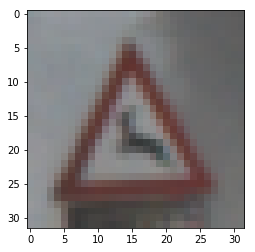

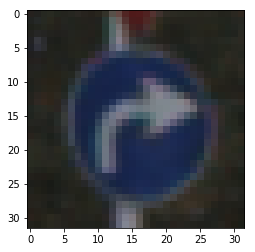

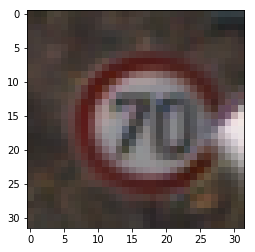

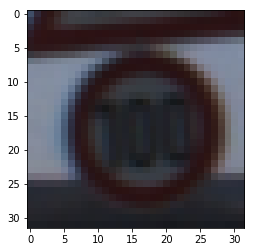

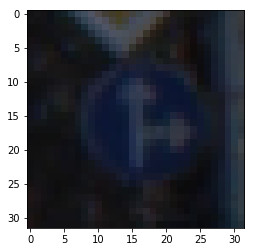

In [34]:
# ## Visualize Data
# 
# View a sample from the dataset.
#
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

image1 = X_train[random.randint(0, len(X_train))].squeeze()
image2 = X_train[random.randint(0, len(X_train))].squeeze()
image3 = X_train[random.randint(0, len(X_train))].squeeze()
image4 = X_train[random.randint(0, len(X_train))].squeeze()
image5 = X_train[random.randint(0, len(X_train))].squeeze()


plt.imshow(image1)
plt.show()

plt.imshow(image2)
plt.show()

plt.imshow(image3)
plt.show()

plt.imshow(image4)
plt.show()

plt.imshow(image5)
plt.show()


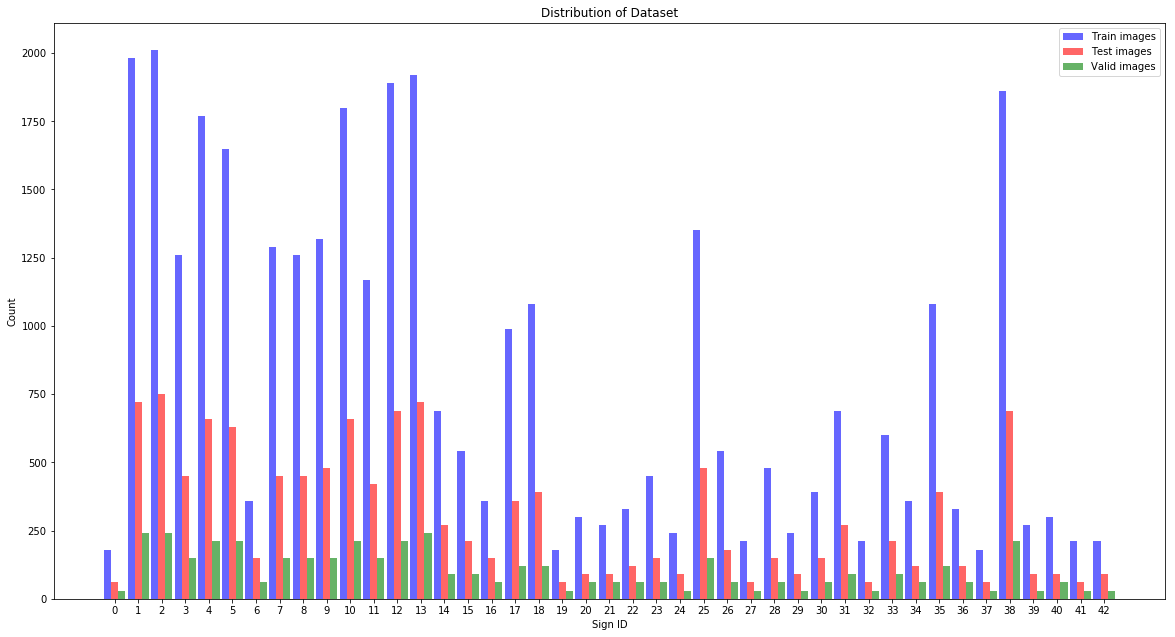

In [5]:
n_groups = max(y_train+1)

ftrain = []
ftest = []
fvalid = []

trainlabel = y_train.tolist()
testlabel = y_test.tolist()
validlabel = y_valid.tolist()

for i in range(n_groups):
    ftrain.append(trainlabel.count(i))
    ftest.append(testlabel.count(i))
    fvalid.append(validlabel.count(i))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.6

rects1 = plt.bar(index, ftrain, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Train images')

rects2 = plt.bar(index + bar_width, ftest, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Test images')

rects2 = plt.bar(index + 2*bar_width, fvalid, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Valid images')
plt.xlabel('Sign ID')
plt.ylabel('Count')
plt.title('Distribution of Dataset')
plt.xticks(index + (2*bar_width) / 2, range(n_groups))
plt.legend()
plt.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# I only use 3 steps
# 1) converting to gray 
# 2) histogram localization 
# 3) scaling to be in [-1,1]
def preprocess_dataset(X, y = None):
    #Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]

    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

    # Apply localized histogram localization
    # Found it somewhere in the internet and it seems to increase the contrast a lot
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])
        
    # Scale features to be in range [-1,1]
    X = ((X*255)-128)/128

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 


    return X, y

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf


# ## Starting with LeNet-5
# Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.
# 
# The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. 

# I have added a variable isTraining in order to switch off dropouts in case of validation and classification
def LeNet(x,isTraining):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    n_classes = 43
    stride = 1

    if (isTraining is True):
       dropout1 = 0.80  # Dropout for training --> at layer 1 with higher dropout rates
       dropout2 = 0.85  # Dropout for training --> at layer 2 with lower dropout rates
       dropout3 = 0.90  # Dropout for training --> at layer 3 with lowest dropout rates
       # assumption: dropout has higher effect at the beginning
       # at the end it might be tough to perform with too less information remaining in the network
    
    else:
       dropout1 = 1.0  # No Dropout when not in training phase!
       dropout2 = 1.0  # No Dropout when not in training phase!
       dropout3 = 1.0  # No Dropout when not in training phase!

    # maxpool K=2
    k =2
    # Store layers weight & bias
    # I used the attribute trainable = True in order to be able to access it from outside for L2 norm
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma),trainable = True),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma),trainable = True),
        'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma),trainable = True),
        'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma),trainable = True),        
        'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma),trainable = True)}

    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bd1': tf.Variable(tf.zeros(120)),
        'bd2': tf.Variable(tf.zeros(84)),
        'out': tf.Variable(tf.zeros(n_classes))}

    
    strides = [1, stride, stride, 1]
    
    # Layer 1: Convolutional. Input = 32x32x1  (last dimension is 1 because I converted to grayscale). Output = 28x28x6.
    layer1conv = tf.nn.conv2d(x, weights['wc1'], strides, 'VALID')
    layer1 = tf.nn.bias_add(layer1conv, biases['bc1'])
    
    # Layer 1: Activation with simple ReLu + Dropout
    layer1 = tf.nn.relu(layer1)
    layer1 = tf.nn.dropout(layer1, dropout1)    

    # Layer 1: Add pooling. Input = 28x28x6. Output = 14x14x6.
    layer1 = tf.nn.max_pool(layer1, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
    
    
    
    #Layer 2: Convolutional. Output = 10x10x16.
    layer2conv = tf.nn.conv2d(layer1, weights['wc2'], strides, 'VALID')
    layer2 = tf.nn.bias_add(layer2conv, biases['bc2'])

    #Layer 2: Activation with simple ReLu + Dropout
    layer2 = tf.nn.relu(layer2)
    layer2 = tf.nn.dropout(layer2, dropout2)    
    
    #Layer 2: Add pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = tf.nn.max_pool(layer2, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

    #Now flatten the stuff . Input = 5x5x16. Output = 400.
    layer2 = tf.reshape(layer2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3 = tf.add(tf.matmul(layer2, weights['wd1']), biases['bd1'])
    
    #Layer 3: Activation with simple ReLu + Dropout
    layer3 = tf.nn.relu(layer3)
    layer3 = tf.nn.dropout(layer3, dropout3)    

    
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4 = tf.add(tf.matmul(layer3, weights['wd2']), biases['bd2'])
    #Layer 4: Activation with simple ReLu but no Dropout
    layer4 = tf.nn.relu(layer4)

    #Layer 5 Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(layer4, weights['out']), biases['out'])

    # return logits and additional the first 2 layers in order to display the feature maps later
    return logits, layer1conv, layer2conv



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [9]:
# first load the preprocessed image - unfortunately the histogram localization takes a lot of time
# thats why I dumped the preprocessed dataset into a new pickle file and use it now

import pickle
import os.path

modified_data = './../../full_data/preproccesimages.pickle'
if os.path.isfile(modified_data):
        print("load preproccesed images...")
        with open(modified_data, mode='rb') as f:
                X_train_hist, y_train_hist, X_test_hist, y_test_hist, X_valid_hist, y_valid_hist = pickle.load(f)

X_train = X_train_hist
X_test = X_test_hist
X_valid = X_valid_hist
y_train = y_train_hist
y_test = y_test_hist
y_valid = y_valid_hist
print("load preproccesed images done!")

load preproccesed images...
load preproccesed images done!


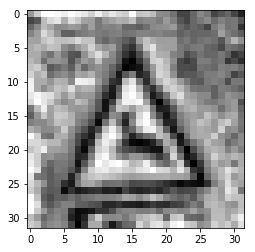

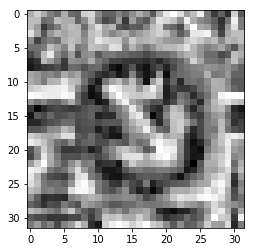

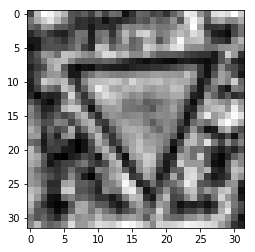

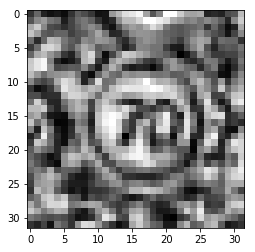

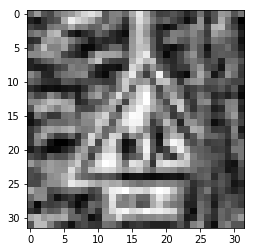

In [30]:
# now just visualize them in order to check wether everything is ok!
image1 = X_train[random.randint(0, len(X_train))].squeeze()
image2 = X_train[random.randint(0, len(X_train))].squeeze()
image3 = X_train[random.randint(0, len(X_train))].squeeze()
image4 = X_train[random.randint(0, len(X_train))].squeeze()
image5 = X_train[random.randint(0, len(X_train))].squeeze()


plt.imshow(image1, cmap="gray")
plt.show()

plt.imshow(image2, cmap="gray")
plt.show()

plt.imshow(image3, cmap="gray")
plt.show()

plt.imshow(image4, cmap="gray")
plt.show()

plt.imshow(image5, cmap="gray")
plt.show()


In [11]:
# Set the attributes for training 
EPOCHS = 110
BATCH_SIZE = 128
n_groups = 43


# ## Features and Labels
# 
# `x` is a placeholder for a batch of input images.
# `y` is a placeholder for a batch of output labels.
# 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))   # last dimension is 1 because I converted to one single gray channel
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_groups)
rate = 0.001

In [12]:
# Now define the training pipeline

from traffic_lenet import LeNet
#logits = LeNet(x,True)  # true when were are in the training phase!
logits = LeNet(x,False)  # false when were are in the training phase!


# Define L2 norm
vars   = tf.trainable_variables() # this command gets all weights which have been defined with attribute trainable=True
lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in vars ]) * 0.001

# use logits[0] because 3 parameters are returned from LeNet!
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits[0], labels=one_hot_y)

# Use softmax + L2 norm for the loss operation
loss_operation = tf.reduce_mean(cross_entropy + lossL2)

# Use the AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# standard: minimize the loss.....
training_operation = optimizer.minimize(loss_operation)

In [13]:
# Now define the validation pipeline

correct_prediction = tf.equal(tf.argmax(logits[0], 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# define the accuracy function for validation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
from sklearn.utils import shuffle
save_file = './../solution/lenet_traffic'
saver = tf.train.Saver()

if (1 == 0):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            print("EPOCH {} ...".format(i+1))
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                #print("Offset: " , offset, "End: " , end)
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            print("Now evaluate test and valid data:")   

            test_accuracy = evaluate(X_test, y_test)
            print("Test Accuracy = {:.3f}".format(test_accuracy))

        saver.save(sess, save_file)
        print("Model saved")
else:    
    print("Training skipped")

Training...

EPOCH 1 ...
Now evaluate test and valid data:
Test Accuracy = 0.729
EPOCH 2 ...
Now evaluate test and valid data:
Test Accuracy = 0.840
EPOCH 3 ...
Now evaluate test and valid data:
Test Accuracy = 0.878
EPOCH 4 ...
Now evaluate test and valid data:
Test Accuracy = 0.883
EPOCH 5 ...
Now evaluate test and valid data:
Test Accuracy = 0.885
EPOCH 6 ...
Now evaluate test and valid data:
Test Accuracy = 0.895
EPOCH 7 ...
Now evaluate test and valid data:
Test Accuracy = 0.899
EPOCH 8 ...
Now evaluate test and valid data:
Test Accuracy = 0.904
EPOCH 9 ...
Now evaluate test and valid data:
Test Accuracy = 0.902
EPOCH 10 ...
Now evaluate test and valid data:
Test Accuracy = 0.909
EPOCH 11 ...
Now evaluate test and valid data:
Test Accuracy = 0.906
EPOCH 12 ...
Now evaluate test and valid data:
Test Accuracy = 0.909
EPOCH 13 ...
Now evaluate test and valid data:
Test Accuracy = 0.911
EPOCH 14 ...
Now evaluate test and valid data:
Test Accuracy = 0.911
EPOCH 15 ...
Now evaluate test

In [14]:
# Execute validation 
save_file = './../solution/lenet_traffic'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    if os.path.isfile(save_file + ".index"):
        saver.restore(sess, save_file)
        print("Restoring..." , save_file)
    else:
        print("Not restoring.....")

    num_examples = len(X_train)
    
    validation_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Restoring... ./../solution/lenet_traffic
Validation Accuracy = 0.970


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [15]:
# Use the same preprocessing function as before.....

# I only use 3 steps
# 1) converting to gray 
# 2) histogram localization 
# 3) scaling to be in [-1,1]
def rgb2gray_normalize(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    #gray = (gray-128)/128

    gray = (gray / 255.).astype(np.float32)
    gray = exposure.equalize_adapthist(gray)
    gray = ((gray*255)-128)/128

    gray = gray.reshape(gray.shape + (1,)) 


    return gray


### Load and Output the Images

C:\ProgramData\Miniconda3\envs\carnd-term1-gpu\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


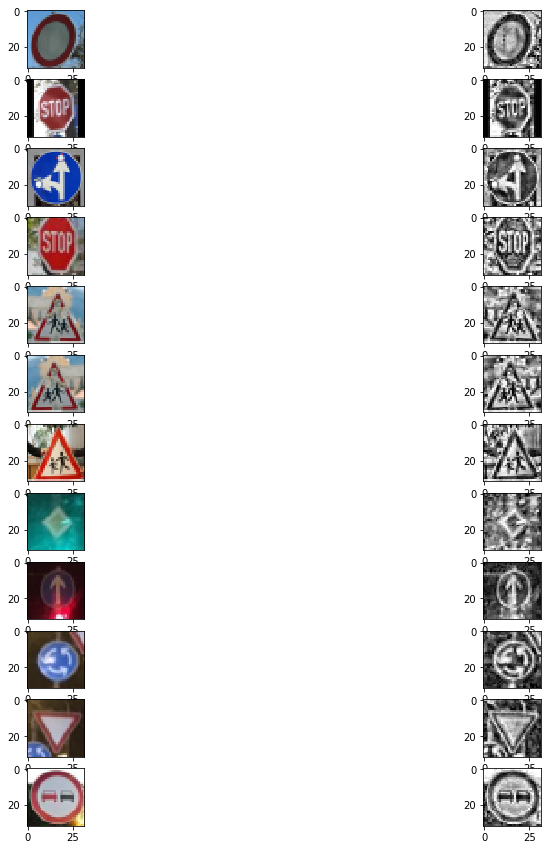

In [16]:
### Load the images and plot them here.
from scipy import misc
from skimage import exposure
import glob

X_valid = []

i = 0
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

filenames = []

for filename in glob.glob(r'./../data/Sue*.png'):
    #print(filename)
    filenames.append(filename.replace("./../data\\", ""))
    sign = misc.imread(filename)

    i = i+1
    plt.subplot(12,2,i)
    plt.imshow(sign.squeeze(), cmap='gray')

    sign = rgb2gray_normalize(sign)

    i = i+1
    plt.subplot(12,2,i)
    plt.imshow(sign.squeeze(), cmap='gray')

    X_valid.append(sign)

plt.show()    
    


In [17]:
# File sue01.png is from Internet
# File sue02.png is from Internet
# File sue03.png is from Internet
# File sue04.png is from Internet
# File sue05.png is from Internet
# File sue05a.png is from Internet  (--> is just a left/right flipped image of sue05.png)
# File sue06.png is from roads in Stuttgart (taken via Iphone)
# File sue07.png is from roads in Stuttgart (taken via Iphone)
# File sue08.png is from roads in Stuttgart (taken via Iphone)
# File sue09.png is from roads in Stuttgart (taken via Iphone)
# File sue10.png is from roads in Stuttgart (taken via Iphone)
# File sue11.png is from roads in Stuttgart (taken via Iphone)

# set the "ground truth" for the downloaded pictures
y_valid = [15,14,37,14,28,28,28,12,35,40,13,9]

### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [19]:
save_file = './../solution/lenet_traffic'
saver = tf.train.Saver()

topPredictions = tf.nn.top_k(tf.nn.softmax(logits[0]), 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    if os.path.isfile(save_file + ".index"):
        saver.restore(sess, save_file)
        print("Restoring..." , save_file)
    else:
        print("Not restoring.....")

    #displayFeatureMap = outputFeatureMap(X_valid,CNN[1],-1,-1,1)

    predictions = sess.run(
        topPredictions,
        feed_dict={x: X_valid})
    
    for fName,truth,predict,values in zip(filenames, y_valid, predictions.indices, predictions.values):
        
        print('File: ',fName, ' Truth:',format(truth, '02d'),' Pred: ', predict[0], end="    ")

        if truth == predict[0]:
            print("Success!")
        else:
            print("Fail!")    

Restoring... ./../solution/lenet_traffic
File:  sue01.png  Truth: 15  Pred:  15    Success!
File:  sue02.png  Truth: 14  Pred:  14    Success!
File:  sue03.png  Truth: 37  Pred:  37    Success!
File:  sue04.png  Truth: 14  Pred:  14    Success!
File:  sue05.png  Truth: 28  Pred:  25    Fail!
File:  sue05a.png  Truth: 28  Pred:  11    Fail!
File:  sue06.png  Truth: 28  Pred:  28    Success!
File:  sue07.png  Truth: 12  Pred:  12    Success!
File:  sue08.png  Truth: 35  Pred:  35    Success!
File:  sue09.png  Truth: 40  Pred:  40    Success!
File:  sue10.png  Truth: 13  Pred:  13    Success!
File:  sue11.png  Truth: 09  Pred:  9    Success!


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
successCount = 0

for fName,truth,predict,values in zip(filenames, y_valid, predictions.indices, predictions.values):

    if truth == predict[0]:
        successCount = successCount + 1
    else: 
        # do nothing
        print()


print('Classified correctly',successCount, 'out of',len(X_valid), 'which is' , format(successCount/len(X_valid)*100,'f'),'percent')



Classified correctly 10 out of 12 which is 83.333333 percent


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


# see above.....
save_file = './../solution/lenet_traffic'
saver = tf.train.Saver()

topPredictions = tf.nn.top_k(tf.nn.softmax(logits[0]), 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    if os.path.isfile(save_file + ".index"):
        saver.restore(sess, save_file)
        print("Restoring..." , save_file)
    else:
        print("Not restoring.....")

    #displayFeatureMap = outputFeatureMap(X_valid,CNN[1],-1,-1,1)

    predictions = sess.run(
        topPredictions,
        feed_dict={x: X_valid})
    
    for fName,truth,predict,values in zip(filenames, y_valid, predictions.indices, predictions.values):
        
        print('File: ',fName, ' Truth:',format(truth, '02d'),' Pred: ', end=" ")
        [print(format(i, '02d'),'[',round(j, 4),']', end=" ") for i,j in zip(predict,values)]

        if truth == predict[0]:
            print("Success!")
        else:
            print("Fail!")    

Restoring... ./../solution/lenet_traffic
File:  sue01.png  Truth: 15  Pred:  15 [ 0.9028 ] 35 [ 0.0312 ] 13 [ 0.0271 ] 12 [ 0.0086 ] 39 [ 0.005 ] Success!
File:  sue02.png  Truth: 14  Pred:  14 [ 0.575 ] 15 [ 0.1666 ] 09 [ 0.0914 ] 12 [ 0.0709 ] 34 [ 0.0195 ] Success!
File:  sue03.png  Truth: 37  Pred:  37 [ 0.975 ] 02 [ 0.0076 ] 39 [ 0.0056 ] 40 [ 0.0043 ] 21 [ 0.0037 ] Success!
File:  sue04.png  Truth: 14  Pred:  14 [ 0.8324 ] 04 [ 0.0309 ] 01 [ 0.0211 ] 13 [ 0.0209 ] 05 [ 0.0197 ] Success!
File:  sue05.png  Truth: 28  Pred:  25 [ 0.4923 ] 12 [ 0.0895 ] 28 [ 0.0731 ] 32 [ 0.0612 ] 03 [ 0.057 ] Fail!
File:  sue05a.png  Truth: 28  Pred:  11 [ 0.2798 ] 01 [ 0.2496 ] 30 [ 0.0888 ] 34 [ 0.0664 ] 26 [ 0.0492 ] Fail!
File:  sue06.png  Truth: 28  Pred:  28 [ 0.8471 ] 35 [ 0.0863 ] 24 [ 0.0494 ] 22 [ 0.0053 ] 30 [ 0.0027 ] Success!
File:  sue07.png  Truth: 12  Pred:  12 [ 0.9998 ] 40 [ 0.0001 ] 01 [ 0.0001 ] 15 [ 0.0 ] 02 [ 0.0 ] Success!
File:  sue08.png  Truth: 35  Pred:  35 [ 0.9872 ] 36 [

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
    plt.show()            

Restoring... ./../solution/lenet_traffic
####################################################
./../data\sue01.png


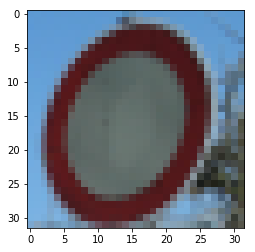

C:\ProgramData\Miniconda3\envs\carnd-term1-gpu\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


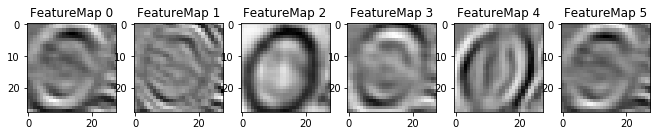

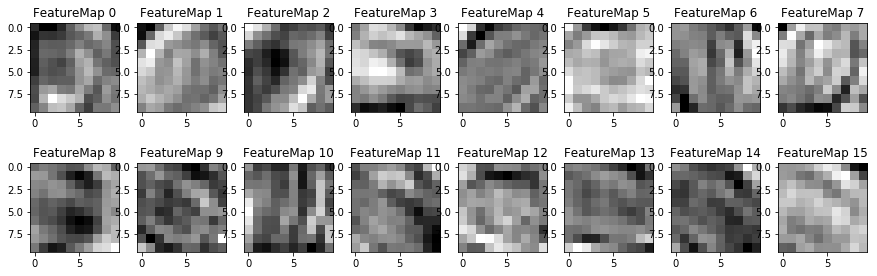

####################################################
./../data\sue02.png


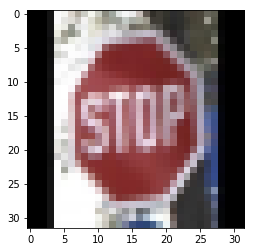

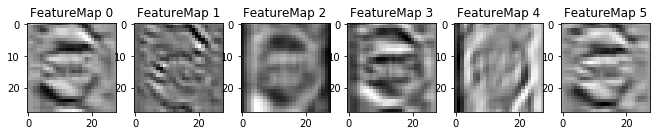

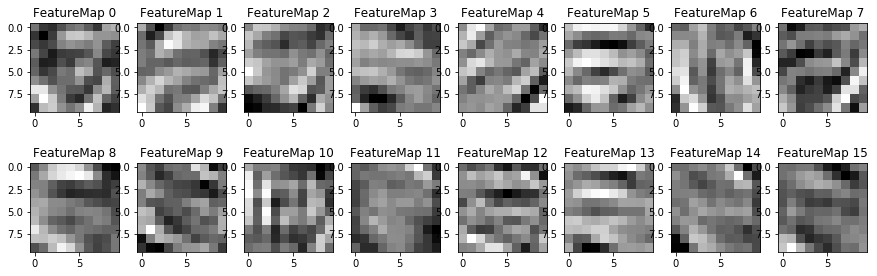

####################################################
./../data\sue03.png


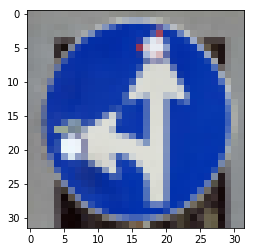

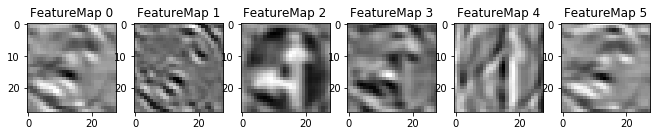

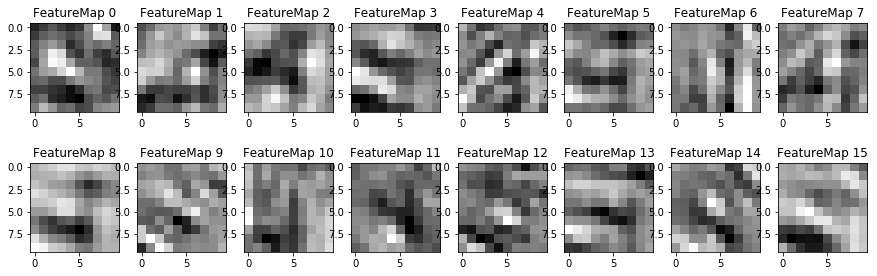

####################################################
./../data\sue04.png


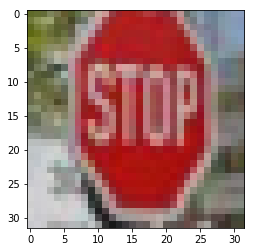

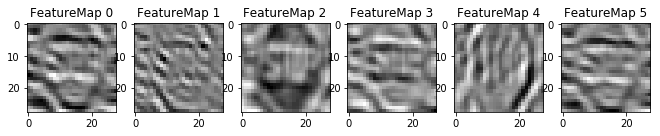

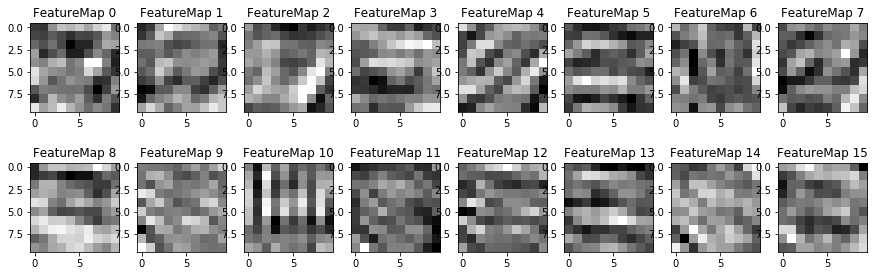

####################################################
./../data\sue05.png


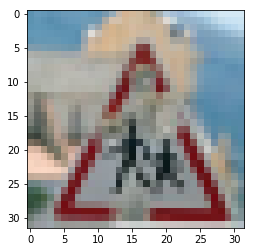

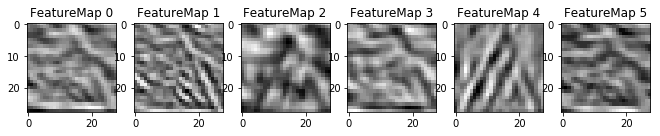

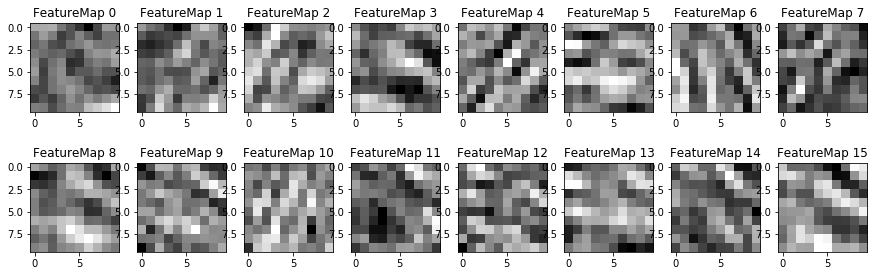

####################################################
./../data\sue05a.png


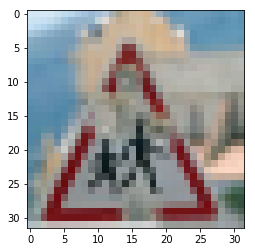

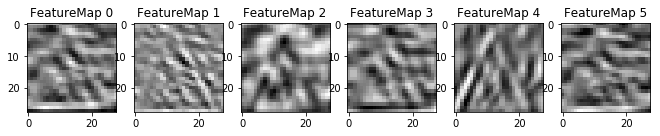

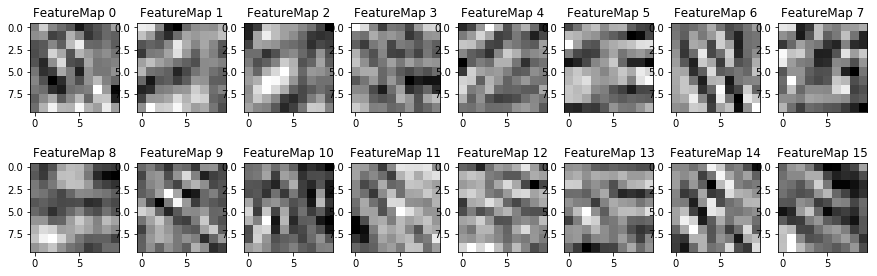

####################################################
./../data\sue06.png


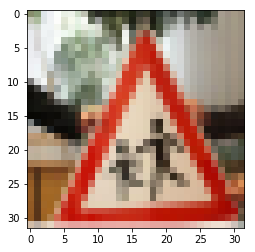

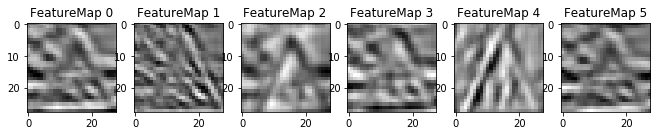

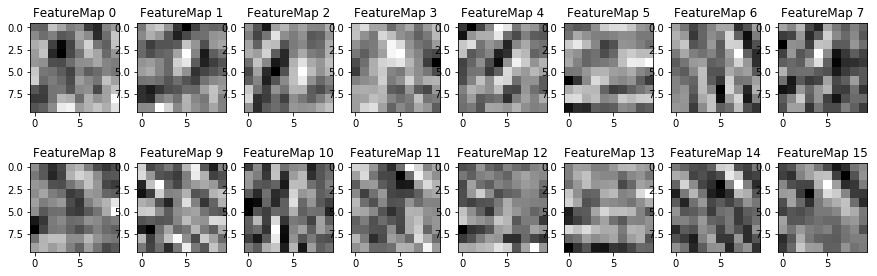

####################################################
./../data\sue07.png


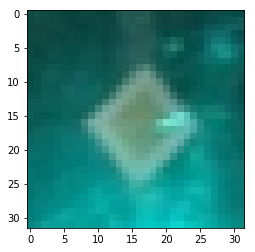

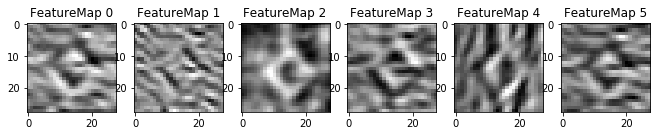

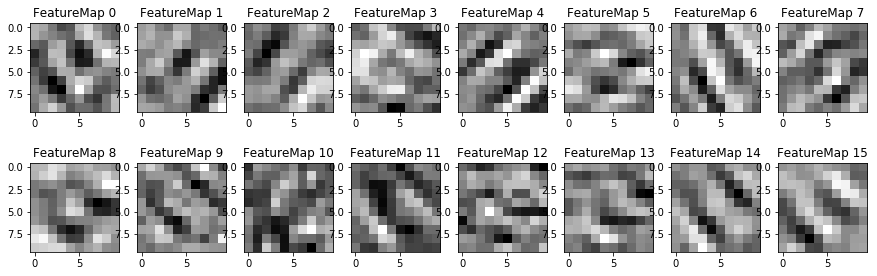

####################################################
./../data\sue08.png


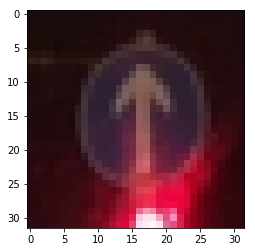

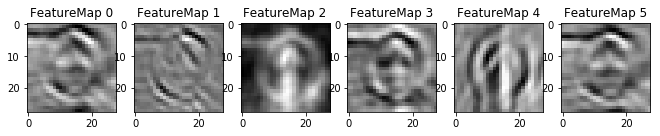

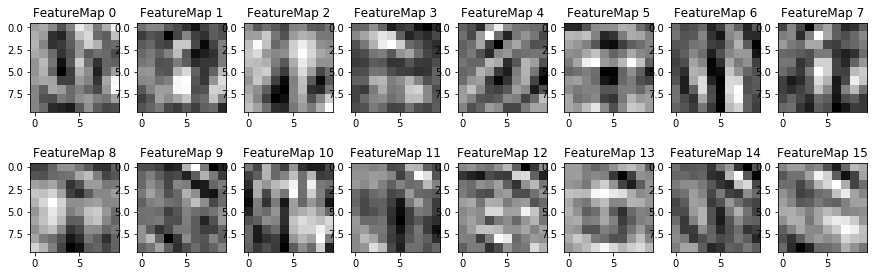

####################################################
./../data\sue09.png


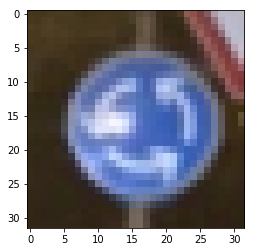

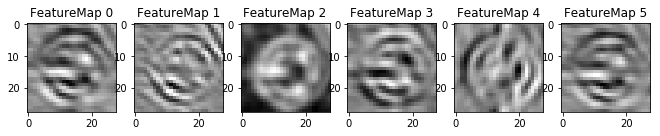

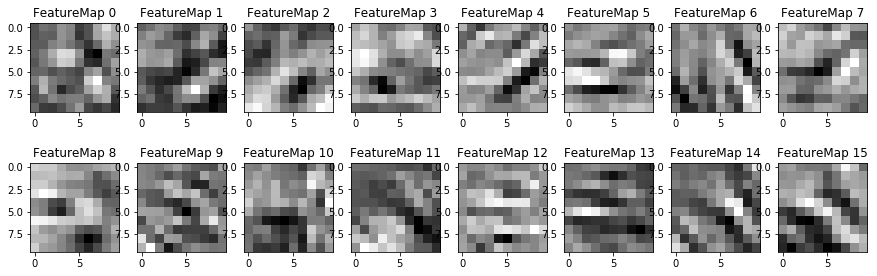

####################################################
./../data\sue10.png


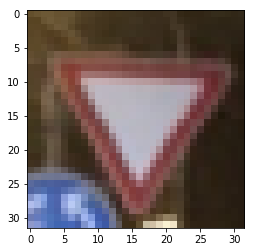

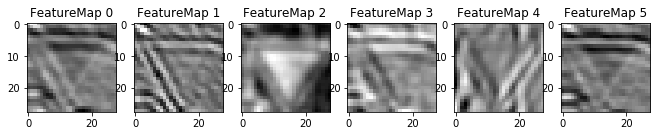

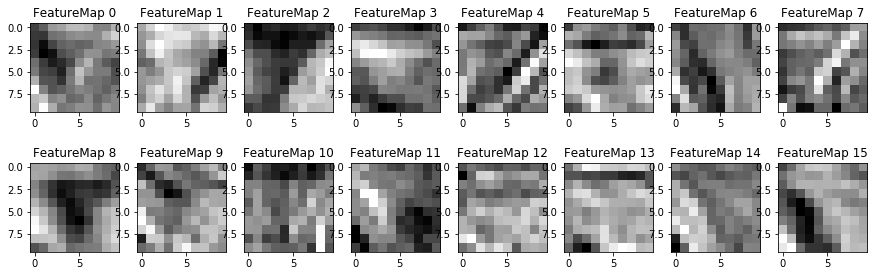

####################################################
./../data\sue11.png


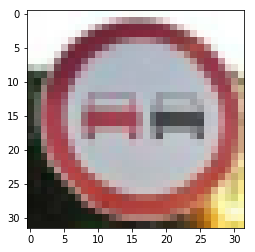

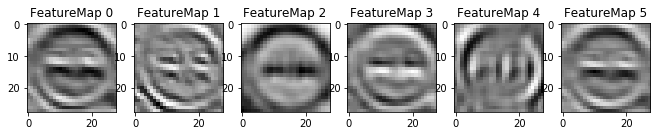

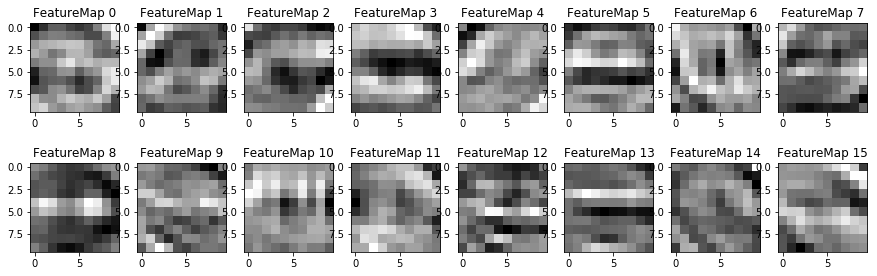

In [23]:
save_file = './../solution/lenet_traffic'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    if os.path.isfile(save_file + ".index"):
        saver.restore(sess, save_file)
        print("Restoring..." , save_file)
    else:
        print("Not restoring.....")

    for filename in glob.glob(r'./../data/Sue*.png'):
        X_valid = []
        sign = misc.imread(filename)
        plt.imshow(sign.squeeze(), cmap='gray')
        print('####################################################')
        print(filename)
        plt.show()
        sign = rgb2gray_normalize(sign)
        #plt.imshow(sign.squeeze(), cmap='gray')
        #plt.show()
        
        X_valid.append(sign)
        displayFeatureMap = outputFeatureMap(X_valid,logits[1],-1,-1,1)
        displayFeatureMap = outputFeatureMap(X_valid,logits[2],-1,-1,1)




### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


In the first convolutional layer it is clearly visible that the network tries to generate forms and edges from color and shape. So this is definitely a strong argument that the network works in a good way.
The resulting features maps could somehow even been identified by humans and classified correctly - at least for the images that have been identified correctly! 
For the two images that have not been classified correctly (sue05.png and sue05a.png) this is definitely not the case: here I could not really identify that it was a "childeren crossing" sign. 
Of course I must admit that it was an image which is hard to identify as there are a lot of bullet holes in there (it was taken from the island Corse where bullet holes in traffic signs are somehow natural....)

Coming to the second feature map layer: for me it is not obvious anymore what the network is exactly looking for. Sometimes you get a glimpse of the shape, but the far most - at least for me - is just "pixel salad". I assume that the network is trying to find interesting areas after the max pooling from the first feature map layer. 

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 